# AOS111 week3
## Goals
- [ ] minmax normalization
- [ ] PART A: Sigmoid function
- [ ] PART B: Logistic regression cost function and gradient
- [ ] PART C: Predicting the classes
- [ ] A scikit-learn example

Created by Donglai Ma, August 2020

## Logistic regression
### Dataset and visualization

We will start with sklearn to create a virtual dataset.
Use [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) to create dataset with 2 categories and 2 features

                  

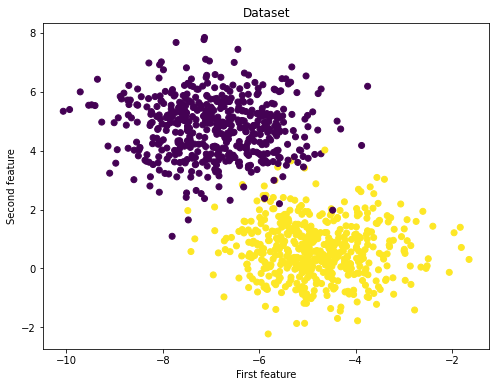

The label test: [1 1 1 0 0 0 1 1 1 0]
The input test:
 [[-4.82009419  0.31265986]
 [-4.85798902 -0.75532612]
 [-5.87148063  0.18708564]
 [-7.11190461  3.67526298]
 [-7.76416753  5.85370709]
 [-8.07763118  4.22166526]
 [-4.71829344  0.25690802]
 [-6.36241819  0.42203809]
 [-4.80205976  0.60763976]
 [-8.02928432  7.01327628]]


In [1]:
#Visualize the data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
X, y_true = make_blobs(centers=2, n_samples = 1000,random_state=12)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
print("The label test:",y_true[0:10])
print("The input test:\n",X[0:10])

### Data preprocessing
1. normalization
In the real world, the range of input features could be different, in this case, the Fisrt feature is about [-10: -2] and the second feature is in [-2 : 8]. In statistics and applications of statistics, normalization can have a range of meanings.In the simplest cases, normalization of ratings means adjusting values measured on different scales to a notionally common scale, it would help increase the speed of gradient descent.

There are multiple ways to do normalization, a common way is min-max normalizaition.

$$x^{\prime}=\frac{x-\min (x)}{\max (x)-\min (x)}$$

2. train-test split
We want to get a model which could successfully seperate data data into different class. We will train the model on training dataset and test the predict accuracy on test dataset



In [2]:
# An example of np.minor max
# A test matrix with 2 features and 4 samples
MytestX = np.array([[1,3],[2,2],[3,4],[4,5]])
print(np.min(MytestX,axis = 0))

[1 2]


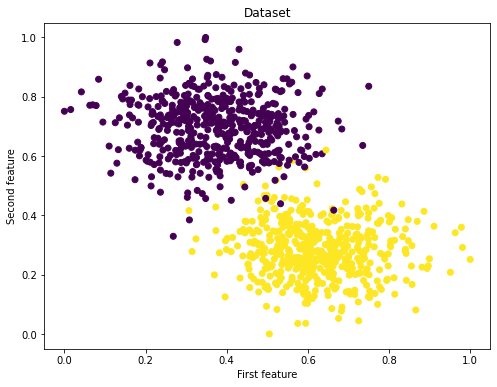

In [3]:
from sklearn.model_selection import train_test_split
def minmax_norm(X):
    """
    @ X: input data
    @ return: X_norm
    """
    X_norm = (X - np.min(X,axis = 0)) / (np.max(X,axis = 0) - np.min(X,axis = 0))
    return X_norm
X_norm = minmax_norm(X)

fig = plt.figure(figsize=(8,6))
plt.scatter(X_norm[:,0], X_norm[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

# split the dataset
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X_norm, y_true, test_size=test_size)



# Now you could see it's mapped to [0,1]

### Logistic regression goal
$$
\hat{y}=h_{\boldsymbol{\theta}}(\boldsymbol{x})=\frac{1}{1+e^{-z}}
$$
where:
$$
z=\theta_{0}+\theta_{1} x_{1}+\cdots=\theta^{T} x
$$

The goal is to find the model parameters $\theta$ that give the best fit to the training data

### Logistic sigmoid function

The sigmoid function is:
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

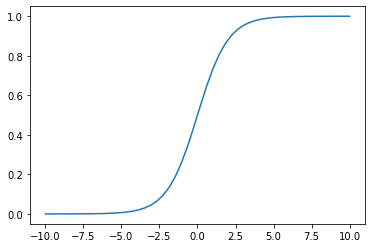

In [4]:
####################
# IN-CLASS CODING: PART A
# Your code starts here
# Return the value of sigmoid (z)
import numpy as np

def sigmoid(z):
    """
    @z: z = wx + b
    @return sigmoid(z)
    """
    return 9999.9999
####################
# Visualize sigmoid function
z_line = np.linspace(-10,10)
plt.plot(z_line,sigmoid(z_line))
plt.show()

### Compute the cost function and gradient descent
The cost function for logistic regression is given by
$$J(\theta)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(h_{\theta}\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right) \log \left(1-\left(h_{\theta}\left(x^{(i)}\right)\right)\right]\right.$$

*(Tips:The real math of where we got this cost function is called [Maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) which we will not cover in this class, you could check the document 'Maximum likelihood' in CCLE )*


where the gradient is given by
$$\frac{\partial J(\theta)}{\partial \theta_{j}}=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}$$


You should remember how we update gradient last week

In [5]:
##############################
# Your code starts here


def computecost(X, y, theta):
    """
    @X : Input  X
    @y : Output y
    @theta : theta array
    @return: cost and gradient
    """
    m = len(y)
    y_pred = sigmoid(X.dot(theta))
    error = y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred)
    cost = -1/m * sum(error)[0]
    return cost

##############################
# IN-CLASS CODING: PART B
# Your code starts here


def computecost(X, y, theta):
    """
    @X : Input  X
    @y : Output y
    @theta : theta array
    @return: cost and gradient
    """
    # m = number of data samples 
    # y_pred = mode predicted values
    # error = error over every data samples
    # cost = average of the errors (look at formula for J above)
    #  # Also calculate the gradient
    # gradient = evaluate the average gradient values dJ/dtheta (above formula)
    cost = 9999.9999
    gradient = 9999.9999
    return cost,gradient # return cost function and its gradient values


##############################


# Gradient descent
# It's the same as last week

def gradientdescent(X, y, theta, alpha, iterations):
    """
    @X: Input X
    @y: Output y
    @theta: theta array
    @alpha: parameters for gradient descent,learning rate
    @iterations: steps of gradient descent
    
    @return :
        @theta: theta array which would been updated
        @costs: history of costs
        we won't need theta history this week
        
    """
    m = len(y)
    costs = []

    for i in range(iterations):
      
        cost_step,gradient_step = computecost(X, y, theta)
        theta -= alpha*gradient_step
        costs.append(cost_step)
        
    return theta, costs

##############################


### Train the model
We use gradient descent to train the model now

Theta after running gradient descent:
 [[  1.77084759]
 [  7.13729839]
 [-11.02167558]]
Result costs: 0.09691206610086427


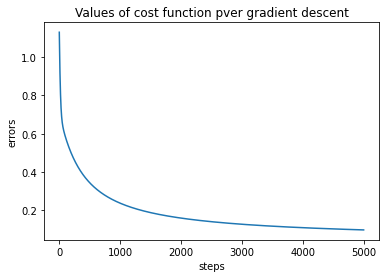

In [6]:
# Add feature x_0 (1)

sample_nums = x_train.shape[0]
feature_nums = x_train.shape[1]


X_train = np.append(np.ones((sample_nums,1)),x_train,axis = 1)
Y_train = y_train.reshape(sample_nums,1)

theta_init = np.ones((feature_nums+1,1)) # theta_0 is actually b in wx + b
theta,costs = gradientdescent(X_train,Y_train,theta_init,alpha=0.1,iterations=5000)
print("Theta after running gradient descent:\n",theta)
print("Result costs:", costs[-1])
plt.xlabel('steps')
plt.ylabel('errors')
plt.plot(costs)
plt.title("Values of cost function pver gradient descent")
plt.show()

### Plot the decision boundary

$$h_{\theta}(x)=\sigma(z)$$ 
when $\sigma(z)\geqslant0.5$ it predicts as class 1, so  $\theta^{T} x \geq 0$ for class 1,so 

$$\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}=0$$
so $x_2 = -(\theta_{0} +\theta_{1}x_{1})/\theta_{2}$ is the decision boundary 

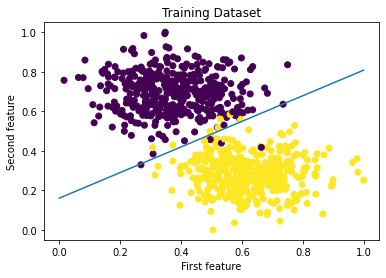

In [7]:
x_b = np.linspace(np.min(X_norm[:,1]),np.max(X_norm[:,1]))
y_b = -(theta[0] + theta[1]*x_b)/theta[2] 
plt.scatter(X_train[:,1], X_train[:,2], c=Y_train)
plt.title("Training Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.plot(x_b,y_b)
plt.show()

### Prediction using the theta

We could use our test dataset to make prediction and test the performance of the model.

$$
\hat{y}=h_{\boldsymbol{\theta}}(\boldsymbol{x})=\frac{1}{1+e^{-z}}
$$
when $\hat{y} > 0.5$ or $z > 0 $ return to class 1,
when $\hat{y} < 0.5$ return to class 0


Predict accuracy: 99.0 %


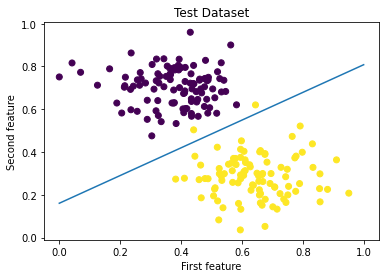

In [8]:
# IN-CLASS CODING: PART C
# Your code starts here

def predict(theta,x):
    """
    @theta: theta array
    @x: (x_0,x_1,x_2) if we got 2 features
    
    return classes
    """
    #predict whether the sample is above or below the decision boundary
    results = 9999.999
    return results>0

sample_test = len(x_test)
X_test = np.append(np.ones((sample_test,1)),x_test,axis = 1)
Y_test = y_test.reshape(sample_test,1)
p = predict(theta,X_test)
print("Predict accuracy:",100 * sum(p==Y_test)[0]/sample_test,"%")


plt.scatter(X_test[:,1], X_test[:,2], c=Y_test)
plt.title("Test Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.plot(x_b,y_b)
plt.show()

## A sklearn example
A sklearn example from the begining, you could see how simple it is( we do not add feature 1 or normalization this time)

Test accuracy of sklearn logistic regression library: 0.99


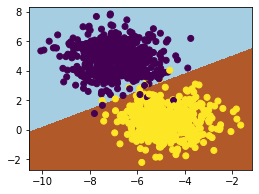

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Creating our model named 'lr'
lr = LogisticRegression()

# Training it by using our train data:
X, y_true = make_blobs(centers=2, n_samples = 1000,random_state=12)
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, y_true, test_size=test_size)



lr.fit(x_train, y_train)

# Printing our accuracy by using our trained model and test data:
print('Test accuracy of sklearn logistic regression library: {}'.format(lr.score(x_test, y_test)))


# plot the decision boundary
xx_min, xx_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
yy_min, yy_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(xx_min, xx_max, h), np.arange(yy_min, yy_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])# ravel is like reshape

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired,shading='auto')
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.show()